In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split

data = load_diabetes()
df_X = data.data
df_y = data.target

X = np.array(df_X)
y = np.array(df_y)

print(type(X), X.dtype)
print(type(y), y.dtype)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> float64
(353, 10) (353,)
(89, 10) (89,)


In [3]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [13]:
LEARNING_RATE = 0.01

global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2897.8084
Iteration 200 : Loss 2874.3727
Iteration 300 : Loss 2873.9601
Iteration 400 : Loss 2873.9524
Iteration 500 : Loss 2873.9519
Iteration 600 : Loss 2873.9514
Iteration 700 : Loss 2873.9510
Iteration 800 : Loss 2873.9505
Iteration 900 : Loss 2873.9501
Iteration 1000 : Loss 2873.9496


2889.628994289454


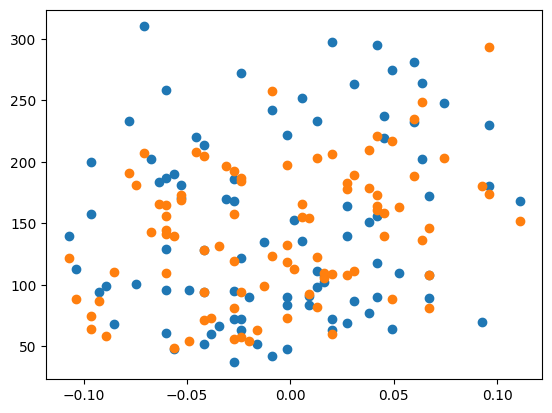

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()